## Analyzing the Video Game Market

- In our project, we delve into the intricate trends shaping the video game market. Armed with these insights, we aim to crystallize a strategic focus for our upcoming game development endeavors. By discerning the optimal platforms to target, genre to focus on, game rating to aim for. Positining us for the highest earning potential.


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [ ]:
##games_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/moved_games.csv')

games_df = pd.read_csv('../moved_games.csv')

In [ ]:
#view data
games_df.head(100)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,3.78,2.17,1.31,0.31,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,3.56,2.35,0.98,0.62,97.0,9.1,E
98,Super Mario Bros. 2,NES,1988.0,Platform,5.39,1.18,0.70,0.19,NaN,NaN,NaN


In [ ]:
#view info of datafram
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
#checking for duplicates
games_df.duplicated().sum()

0

In [ ]:
#checking for na.. 
games_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
#make columns lowercase 
games_df.columns = games_df.columns.str.lower()


In [ ]:
#drop missing name column data
games_df = games_df.dropna(subset='name')

In [ ]:
#create map of game release years to fill in missing data
games_year_mapping = games_df.set_index(['name'])['year_of_release'].to_dict() 


In [ ]:
#fill in missing data
games_df.loc[:, 'year_of_release'] = games_df.apply(lambda row: games_year_mapping.get((row['name']), row['year_of_release']) if pd.isna(row['year_of_release']) else row['year_of_release'], axis=1)  

In [ ]:
#convert to year_of_release to datetime format
games_df['year_of_release'] = pd.to_datetime(games_df['year_of_release'], format='%Y', errors='coerce').dt.year.fillna(0).astype(int)

In [ ]:
#drop where there is no release year
games_df = games_df.drop(games_df[games_df['year_of_release']==0].index)

In [ ]:
#calculate the total sales
games_df['total_sales'] = (games_df['na_sales'] + games_df['eu_sales'] +games_df['jp_sales'] + games_df['other_sales'])

In [ ]:
#change user_score to float and replace 'tbd' with NaN
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan).astype(float)



I have decided to leave in NaN in scores since it will delete a lot of other data that is going to be useful 
and will remove later when needing to analyze these columns further. 





## Line Chart of Games Released each year. 


c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


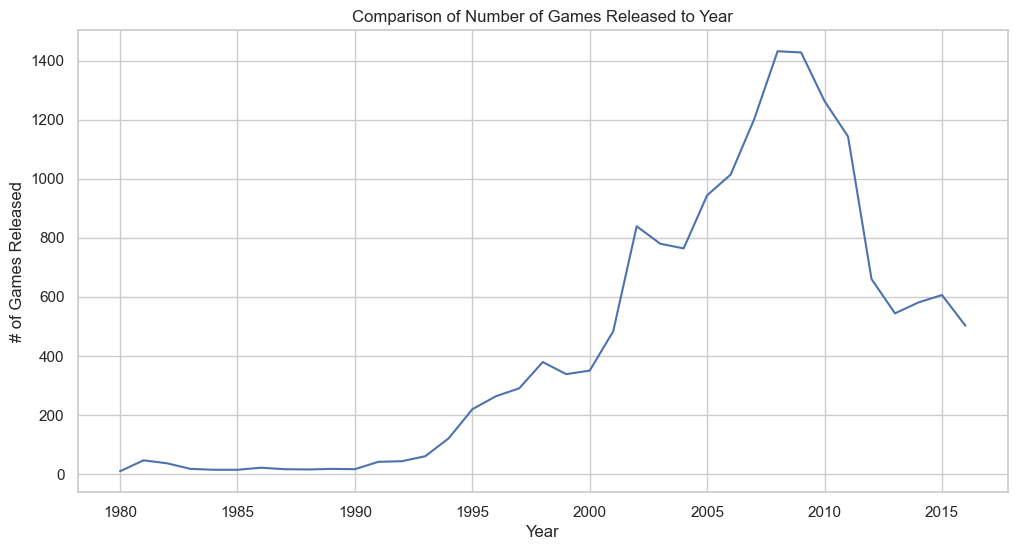

In [ ]:
#create df of games by how many where released each year to
game_count_df = games_df.groupby(['year_of_release'])['name'].count().reset_index()

#create line plot to see trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=game_count_df, x='year_of_release', y='name')
plt.title('Comparison of Number of Games Released to Year')
plt.xlabel('Year')
plt.ylabel('# of Games Released')
plt.show()

- The amount of video games being released peaked around 2008.
- Since thern there has been a quick decline in amount of games being released each year. 

## Line Chart of Total Sales Over Years for Each Platform


c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


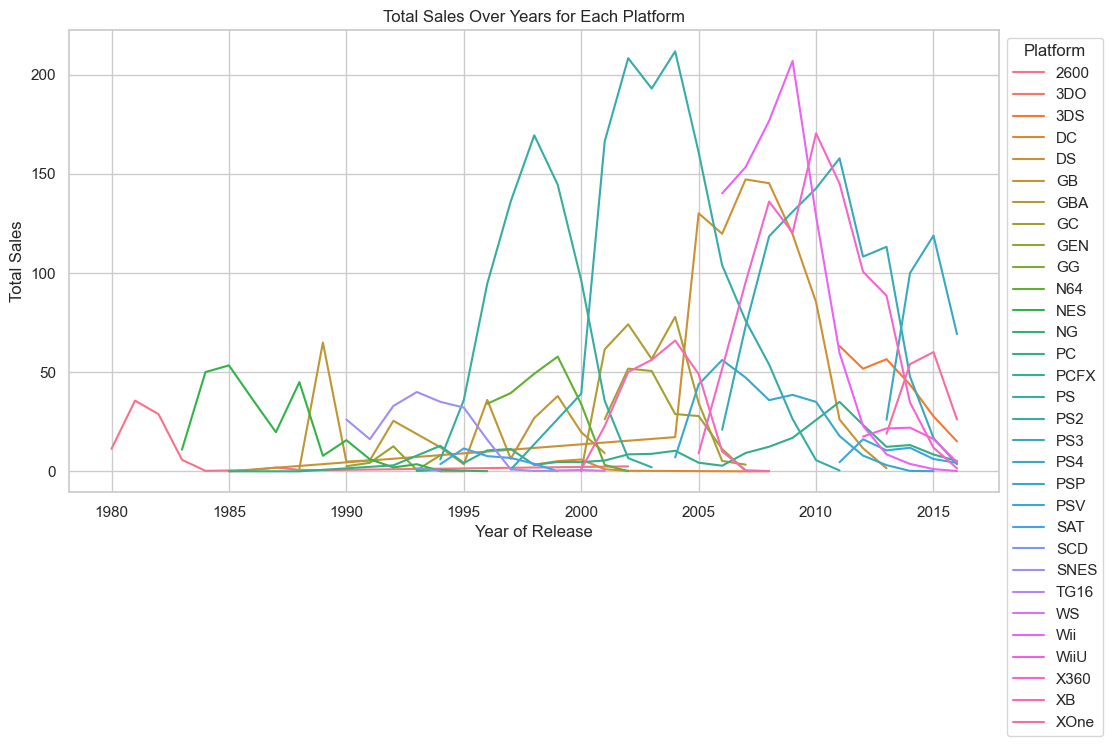

In [ ]:
#create database total number of sales for each platform each year
platform_sales_df = games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#create lineplot to view data trends for how long platforms typically sell
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_sales_df, x="year_of_release", y="total_sales", hue='platform')
plt.title('Total Sales Over Years for Each Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

 - We see the performance of all the platforms since 1980, but the data is hard to analyze

## Line chart to view data trends for how the three  platforms: Nintendo, Microsoft, Sony

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


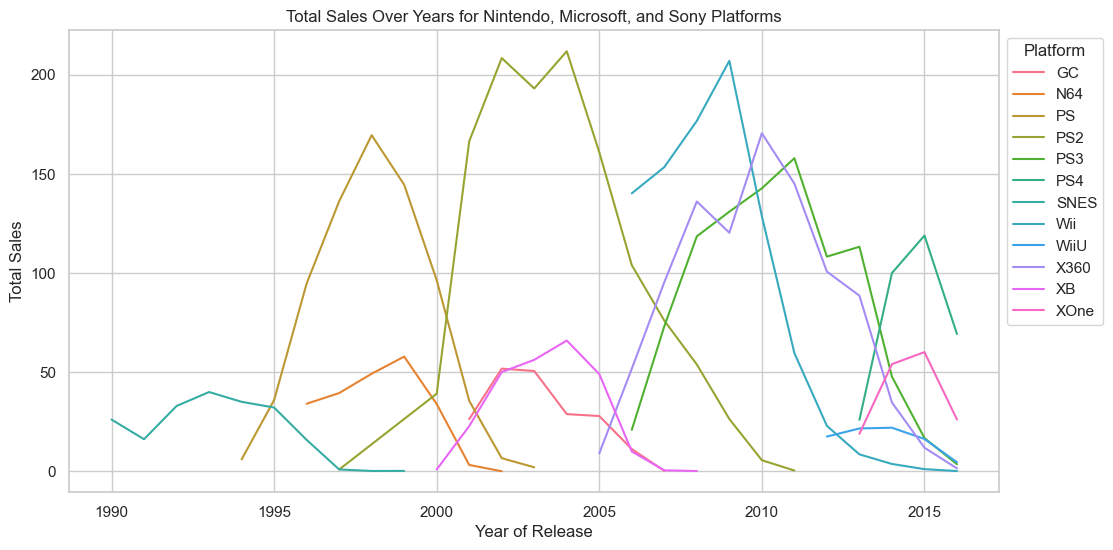

In [ ]:

#create lineplot to view data trends for how the three  major platforms: Nintendo, Microsoft, Sony
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_sales_df[platform_sales_df['platform'].isin(['PS','PS2','PS3','PS4','SNES','N64','GC','Wii','WiiU', 'X360','XB','XOne'])], x="year_of_release", y="total_sales", hue='platform')
plt.title('Total Sales Over Years for Nintendo, Microsoft, and Sony Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Line Chart to look at how Sony home video console platforms have preformed 

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


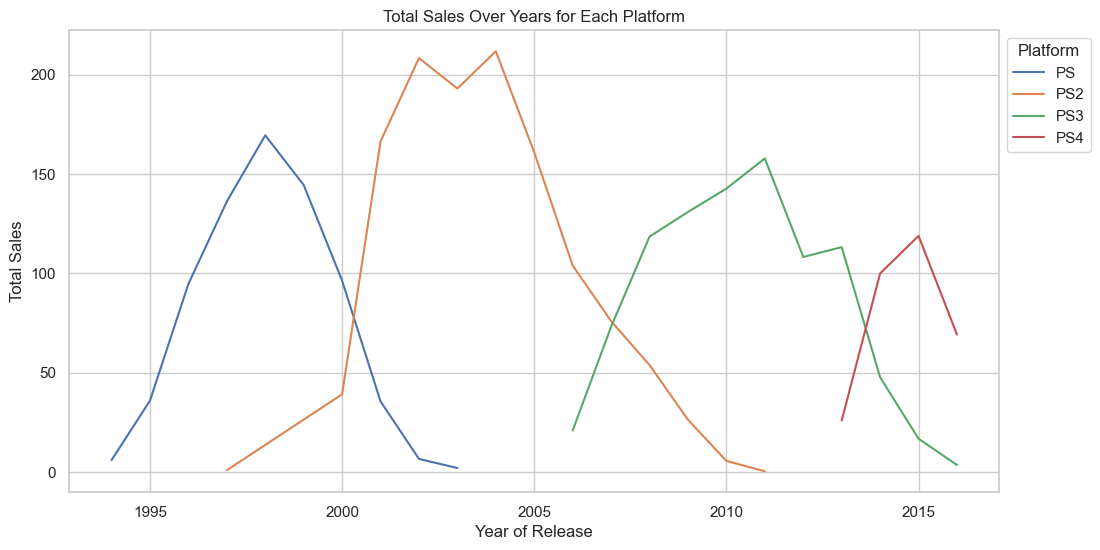

In [ ]:
#create database total number of sales for each platform each year
platform_sales_df = games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#create lineplot to view data trends for how long platforms typically sell
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_sales_df[platform_sales_df['platform'].isin(['PS','PS2','PS3','PS4'])], x="year_of_release", y="total_sales", hue='platform')
plt.title('Total Sales Over Years for Each Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Lineplot to look at how Nintendo home video console platforms have preformed 

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


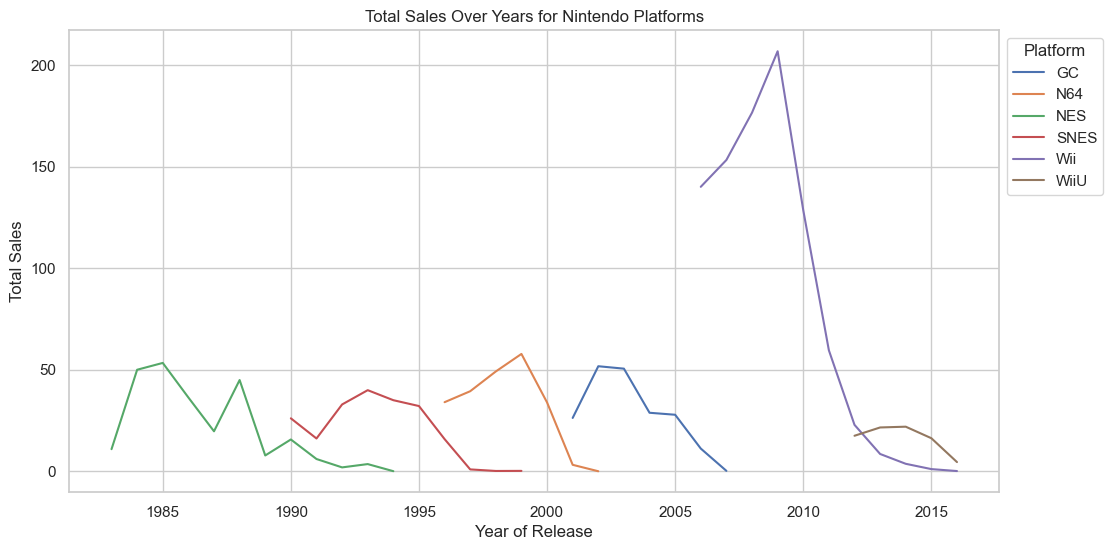

In [ ]:
#create lineplot to view data trends for how long Nintendo platforms typically sell
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_sales_df[platform_sales_df['platform'].isin(['NES','SNES','N64','GC','Wii','WiiU'])], x="year_of_release", y="total_sales", hue='platform')
plt.title('Total Sales Over Years for Nintendo Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- Platforms have 5 -10 year lifespan 
- New platforms pop up every one to two years
- Sony Platforms have longer lifespans than other platforms
- Sony sells has higher sales than all other platforms
- Wii and X360 are the only other platforms to do as well Sony Platforms 



## View Sales History of the PS2 the most popular console. 

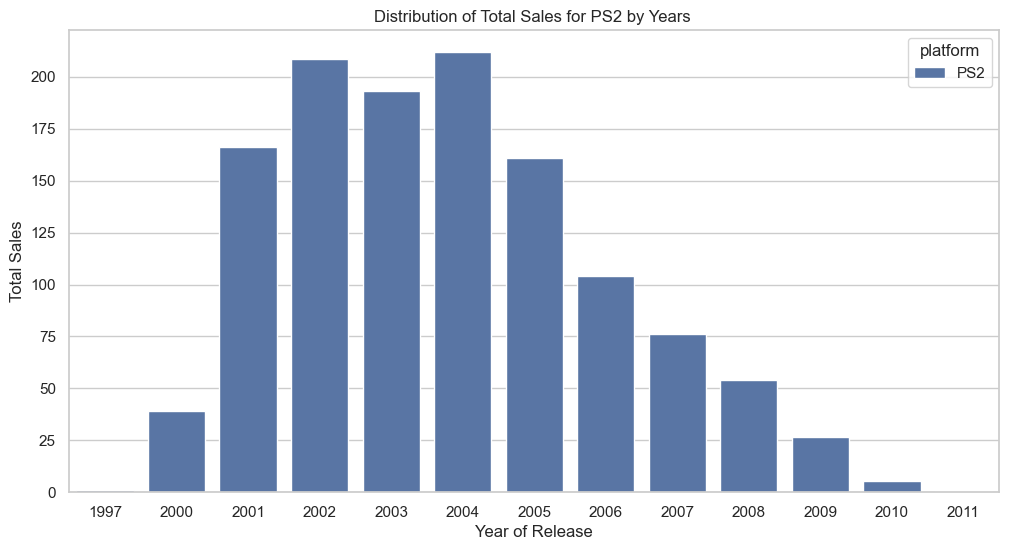

In [ ]:
#create df of total sales of platform df
platform_total_sales_df = platform_sales_df.groupby('platform')['total_sales'].sum().reset_index(name='total_sales')

#get the platform with the most sales
max_platform = platform_total_sales_df['platform'][platform_total_sales_df['total_sales'] == platform_total_sales_df['total_sales'].max()]

#create database for bar plot for sales by year
max_platform_plot_df = platform_sales_df[platform_sales_df['platform'] == max_platform.item()]

#crete barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=max_platform_plot_df, x='year_of_release', y='total_sales', hue='platform')
plt.title('Distribution of Total Sales for PS2 by Years ')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.show()


- The PS2 sold the best between 2002-2004 after its second year of release
- After 2004 sales in games slowly came down for the next 6 years
- The PS2 had an 11 year run



- Looking at the trends we should concentrate on data from 2014 to 2016 on for our predictions
- This time seems the closest to the data trends we see at this time where many game systems are coming to an end at the same time


In [ ]:
#select data to view for further analysis for predictions
games_select_df = games_df[(games_df['year_of_release'] >= 2014)]

## Chart for current date range to view platform performance


c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


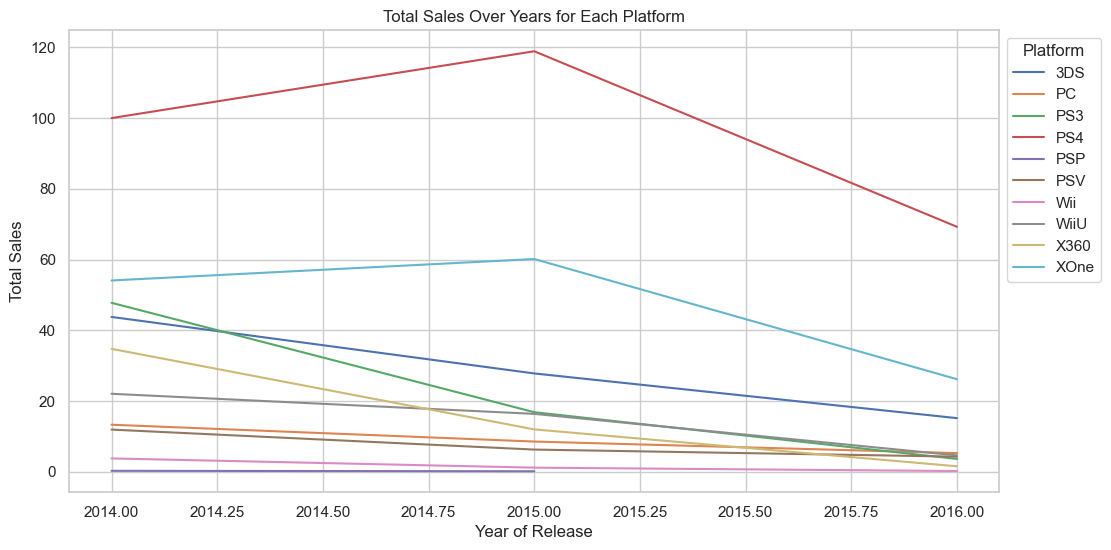

In [ ]:
platform__select_sales_df = games_select_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#create lineplot to view data trends for how long platforms typically sell
plt.figure(figsize=(12,6))
sns.lineplot(data=platform__select_sales_df, x="year_of_release", y="total_sales", hue='platform')
plt.title('Total Sales Over Years for Each Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

- PS4 is selling the best
- The Three most profitable at the moment are PS4, Xone, and 3DS
- 3DS is a handheld console 
- All platforms are losing popularity
- Wii and PSP are not relavent to our predictions since they are older consoles. 

In [ ]:
#drop Wii and PSP from dataset
platform__select_sales_df = platform__select_sales_df[~platform__select_sales_df['platform'].isin(['Wii','PSP'])]

## Boxplot of Games by Platform 2014-2016 

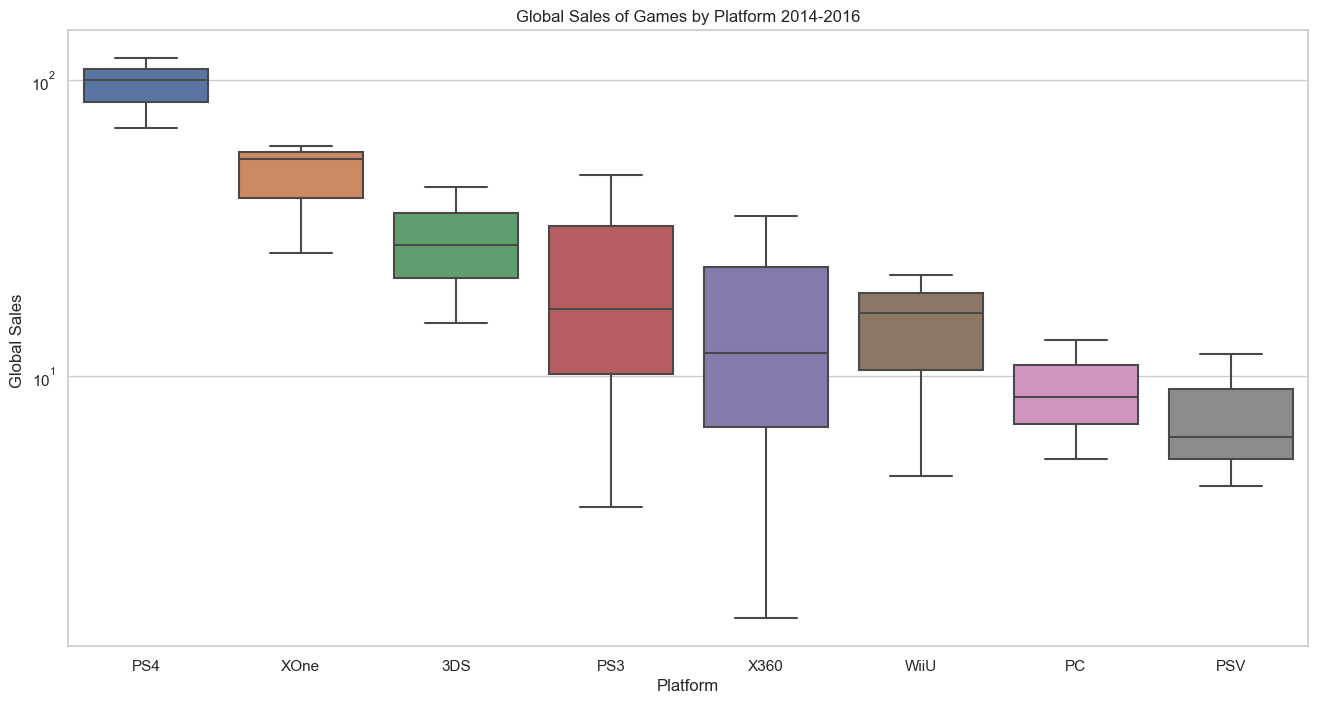

In [ ]:
#create boxplot of all games Sales by platform:
plt.figure(figsize=(16, 8))
sns.boxplot(data=platform__select_sales_df, x='platform', y='total_sales', order=platform__select_sales_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index)
plt.title('Global Sales of Games by Platform 2014-2016')
plt.xlabel('Platform')
plt.ylabel('Global Sales ')
plt.yscale('log') 
plt.show()





- PS4 has the largest median total sales than other platforms, with sales on all games selling well
- XOne has the second largest median sales totals, and all games selling well 
- X360 has the widest spread of sales and is in the middle medium sales total. It has the lowest sales of some games.
- The two platforms we should concentrate on are PS4 and XOne 

In [ ]:
#drop NaN data from critic_score column
games_critic_df = games_select_df.dropna(subset=['critic_score'])


## Scatter Plot to look at coralation between critic scores to total sales on the PS4

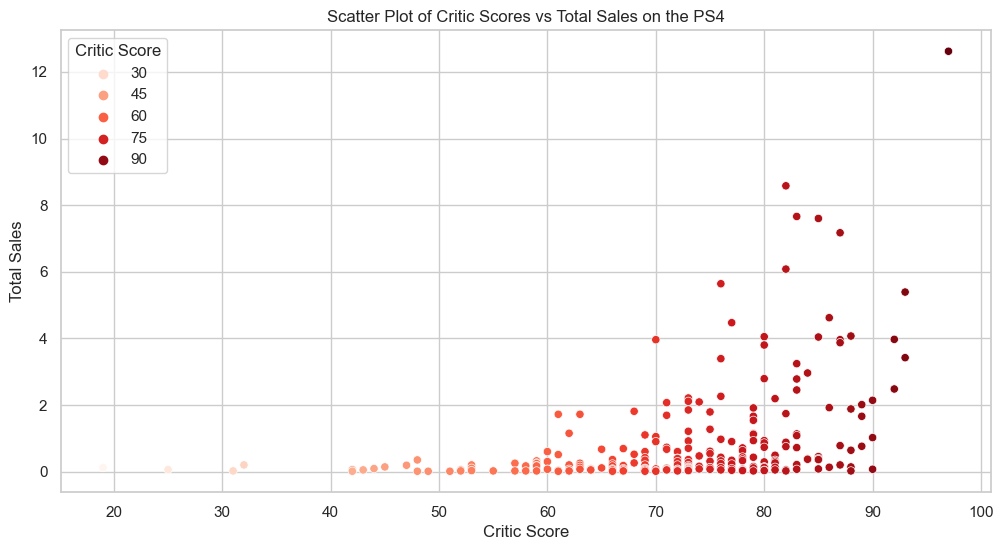

In [ ]:
#create df of just PS4 games
games_ps4_df = games_critic_df[games_critic_df['platform'] == 'PS4']

#create scatter plot graph to look at critic scores to total sales
plt.figure(figsize=(12,6))
sns.scatterplot(data=games_ps4_df, x="critic_score", y="total_sales", hue="critic_score", palette='Reds')
plt.title('Scatter Plot of Critic Scores vs Total Sales on the PS4')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Critic Score', loc='upper left')
plt.show()

- the higher the critic score the higher chance a game has of selling well. 
- the highest critic scored game has sold the most 

## Three Scatterplots to look at XOne, 3DS, and PS3 coralation between reveiws and price

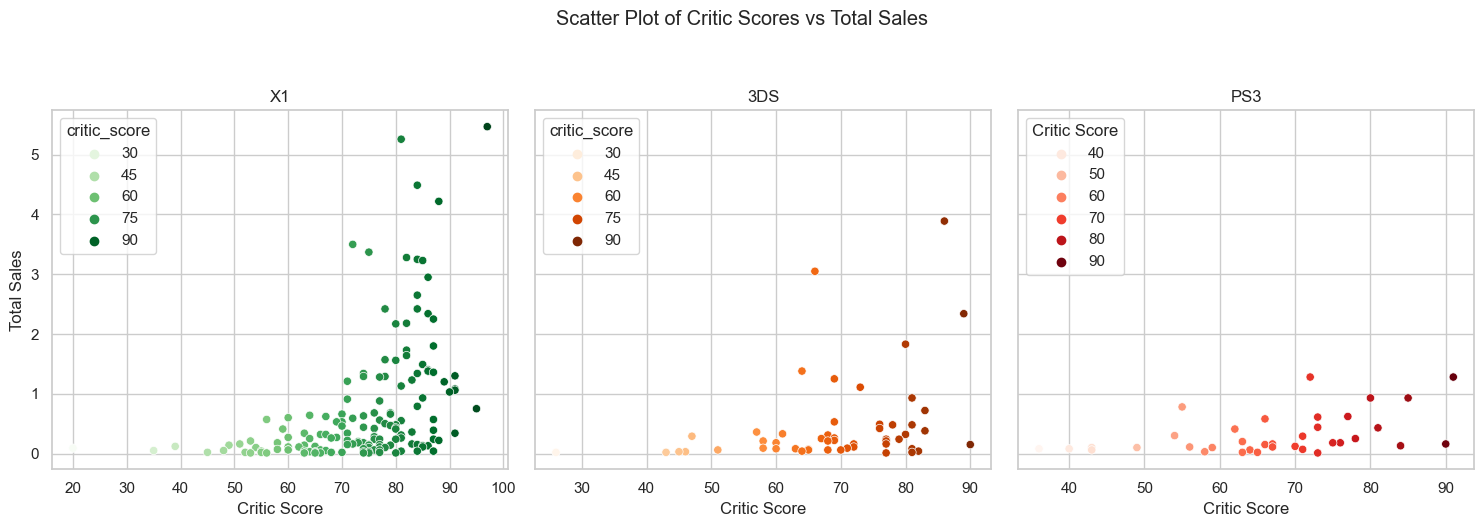

In [ ]:
#create df of just PS4 games
games_x1_df = games_critic_df[games_critic_df['platform'] == 'XOne']
games_3ds_df = games_critic_df[games_critic_df['platform'] == '3DS']
games_ps3_df = games_critic_df[games_critic_df['platform'] == 'PS3']

#create scatter plot graph to look at critic scores to total sales

sns.set(style="whitegrid")
# Create a figure and a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.scatterplot(ax=axes[0], data=games_x1_df, x="critic_score", y="total_sales", hue='critic_score', palette='Greens')
axes[0].set_title('X1')
axes[0].set_xlabel('Critic Score')
axes[0].set_ylabel('Total Sales')

# Scatter plot 2
sns.scatterplot(ax=axes[1],data=games_3ds_df, x="critic_score", y="total_sales", hue='critic_score', palette='Oranges')
axes[1].set_title('3DS')
axes[1].set_xlabel('Critic Score')
axes[1].set_ylabel('Total Sales')

# Scatter plot 3
sns.scatterplot(ax=axes[2],data=games_ps3_df, x="critic_score", y="total_sales", hue='critic_score', palette='Reds')
axes[2].set_title('PS3')
axes[2].set_xlabel('Critic Score')
axes[2].set_ylabel('Total Sales')

#create title for all 4 charts
plt.suptitle('Scatter Plot of Critic Scores vs Total Sales', y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(title='Critic Score', loc='upper left')
plt.show()


- this further shows the same trend we saw on the 'PS4' with higher critic reviews coralating to higher sales totals

## Barplot on Genres Sales

<function matplotlib.pyplot.show(close=None, block=None)>

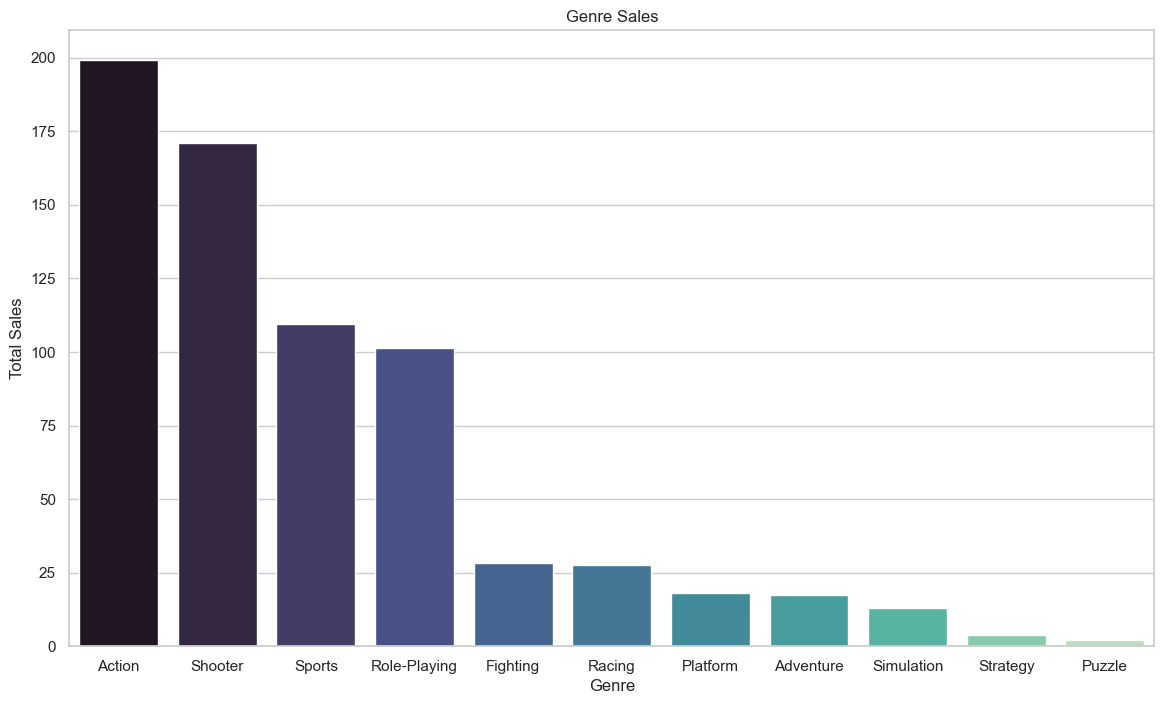

In [ ]:

genre_totals_df = games_select_df.groupby('genre')['total_sales'].sum().reset_index(name='total_sales')

#drop Misc Genre as this is missing data and does not show anything relevant
genre_totals_df = genre_totals_df[~genre_totals_df['genre'].isin(['Misc'])]

sorted_df = genre_totals_df.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(data=sorted_df , x='genre', y='total_sales', palette='mako')
plt.title('Genre Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show

- The most profitable games are action followed by Shooter and Sports.
- The least profitable are Simulation Strategy and Puzzle. 
- There is a sharp drop off in sales after the Role-Playing games

## Bar Chart of the Markets Shares of the Top 5 Platforms

In [ ]:
#make a new dtaframe for games_markets
games_market_df = games_select_df

#get the total_market sales without other_sales
games_market_df.loc[:, 'total_market_sales'] = games_market_df['na_sales'] + games_market_df['eu_sales'] + games_market_df['jp_sales'] 

#create maket share percentages for each market
games_market_df.loc[:, 'na_share'] = (games_market_df['na_sales'] / games_market_df['total_market_sales'] *100).round(2)
games_market_df.loc[:, 'eu_share'] = (games_market_df['eu_sales'] / games_market_df['total_market_sales'] *100).round(2)
games_market_df.loc[:, 'jp_share'] = (games_market_df['jp_sales'] / games_market_df['total_market_sales'] *100).round(2)

#create database pf platforms and there share of each market territory 
platform_market_df = games_market_df.groupby('platform')[['na_share','eu_share','jp_share']].mean().reset_index()
#select only certain platforms
platform_market_df = platform_market_df[platform_market_df['platform'].isin(['PS4','XOne','3DS','PS3','X360'])]

#order the platforms 
platform_order = ['PS4', 'XOne', '3DS', 'PS3', 'X360']
platform_market_df = platform_market_df.set_index('platform').reindex(platform_order).reset_index()


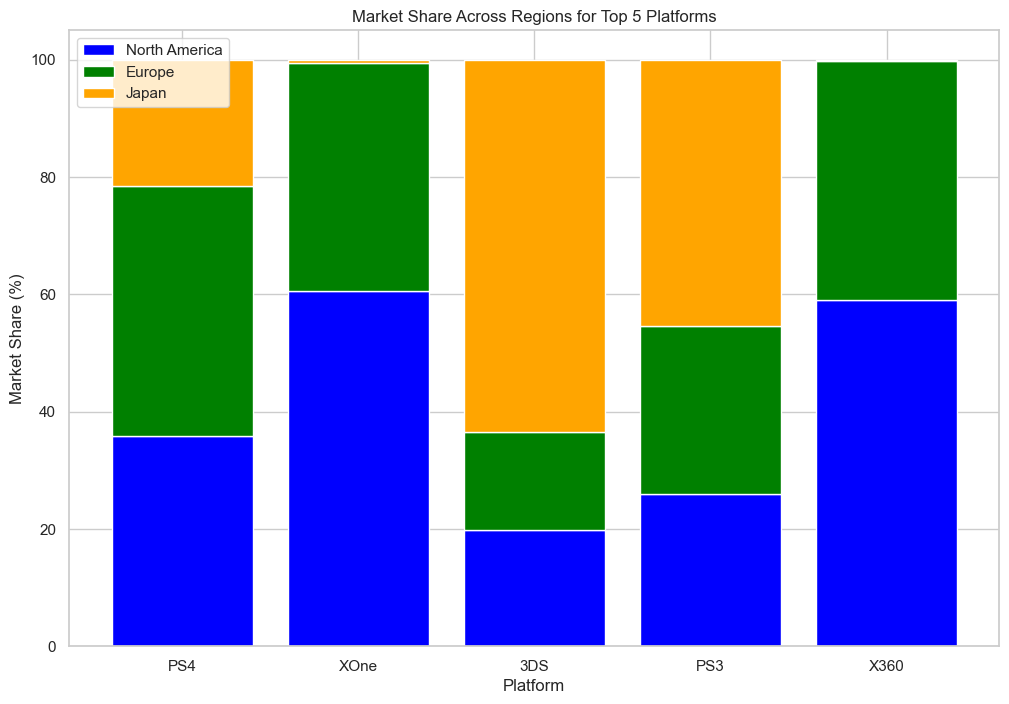

In [ ]:
plt.figure(figsize=(12, 8))

plt.bar(platform_market_df['platform'], platform_market_df['na_share'], label='North America', color='blue')
plt.bar(platform_market_df['platform'], platform_market_df['eu_share'], bottom=platform_market_df['na_share'], label='Europe', color='green')
plt.bar(platform_market_df['platform'], platform_market_df['jp_share'], bottom=platform_market_df['na_share']+platform_market_df['eu_share'], label='Japan', color='orange')

plt.title('Market Share Across Regions for Top 5 Platforms')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')
plt.legend()
plt.show()

- PS4 has the most evenly distributed maket share between the three regions
- Japanese do not use the XOne of X360
- Japanese use the 3DS the most
- North America use the XOne and X360

## Bar Chart of Market Share Across Regions for Top 5 Genres

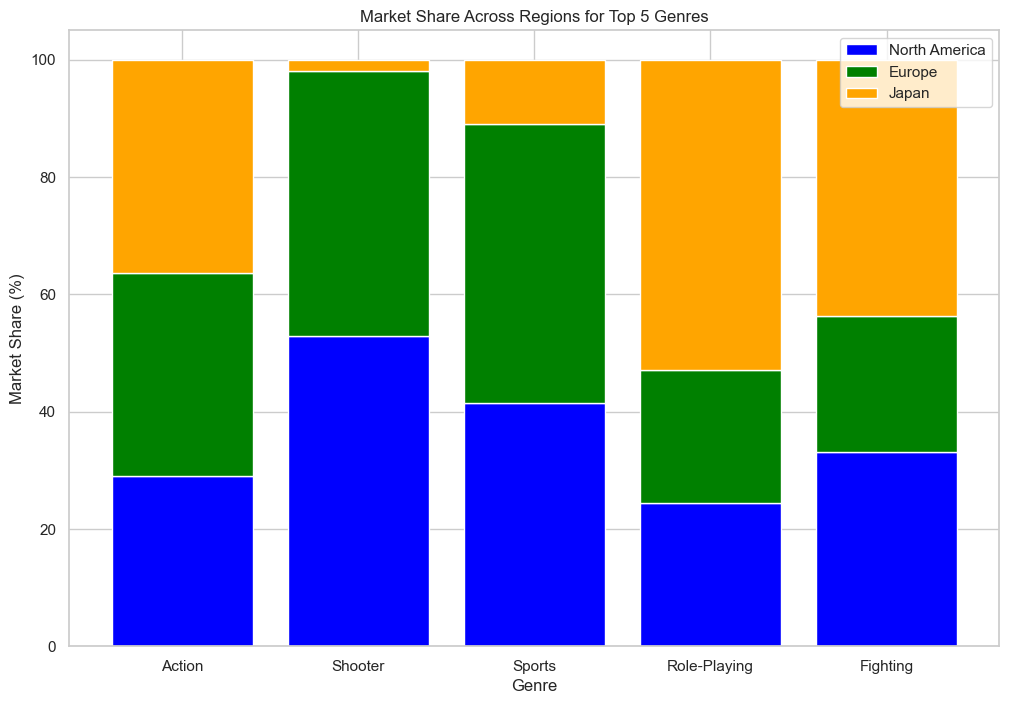

In [ ]:
#create df of genre and the market shares and get only the top five genres
genre_market_df = games_market_df.groupby('genre')[['na_share','eu_share','jp_share']].mean().reset_index()
genre_market_df = genre_market_df[genre_market_df['genre'].isin(['Action','Shooter','Sports','Role-Playing','Fighting'])]
                                                                          
#order dataframe
genre_order = ['Action','Shooter','Sports','Role-Playing','Fighting']
genre_market_df = genre_market_df.set_index('genre').reindex(genre_order).reset_index()

#create barplot to show data
plt.figure(figsize=(12, 8))

plt.bar(genre_market_df['genre'], genre_market_df['na_share'], label='North America', color='blue')
plt.bar(genre_market_df['genre'], genre_market_df['eu_share'], bottom=genre_market_df['na_share'], label='Europe', color='green')
plt.bar(genre_market_df['genre'], genre_market_df['jp_share'], bottom=genre_market_df['na_share']+genre_market_df['eu_share'], label='Japan', color='orange')

plt.title('Market Share Across Regions for Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Market Share (%)')
plt.legend()
plt.show()

- North America most popular game type are Shooter with Japanes Market not playing it
- Japans most popular game type are Role-Playing
- Europe is most popular genres are split between Shooter and Sports
- Action the most popular genre performs evenly all three territories

## Bar Plot of Game Ratings Sales and Each Territory

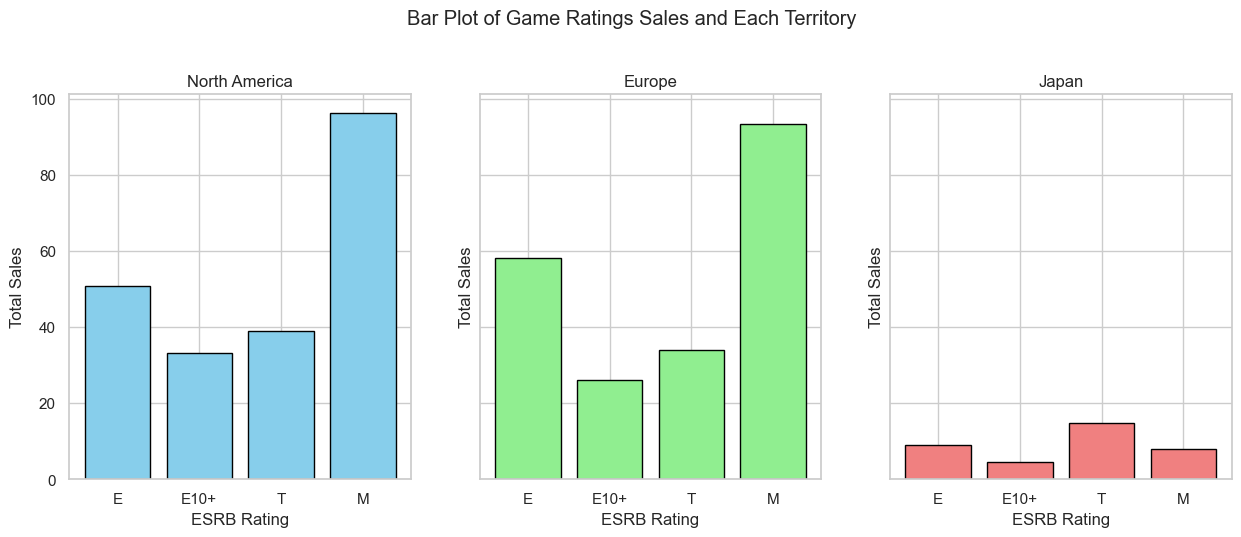

In [ ]:
#create game rating df dropping NaN rating data
games_rating_df = games_market_df.dropna(subset='rating')

#create ratings totals for each region
ratings_totals_df = games_rating_df.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum().reset_index()

#sort data frame
ratings_order = ['E','E10+','T','M']
ratings_totals_df = ratings_totals_df.set_index('rating').reindex(ratings_order).reset_index()

#Create three charts to view data
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
#chart 1
axes[0].bar(ratings_totals_df['rating'], ratings_totals_df['na_sales'], color='skyblue', alpha=1.0, edgecolor='black')
axes[0].set_title('North America')
axes[0].set_xlabel('ESRB Rating')
axes[0].set_ylabel('Total Sales')

#chart 2
axes[1].bar(ratings_totals_df['rating'], ratings_totals_df['eu_sales'], color='lightgreen', alpha=1.0, edgecolor='black')
axes[1].set_title('Europe')
axes[1].set_xlabel('ESRB Rating')
axes[1].set_ylabel('Total Sales')

#chart 3
axes[2].bar(ratings_totals_df['rating'], ratings_totals_df['jp_sales'], color='lightcoral', alpha=1.0, edgecolor='black')
axes[2].set_title('Japan')
axes[2].set_xlabel('ESRB Rating')
axes[2].set_ylabel('Total Sales')

#create title for all 4 charts
plt.suptitle('Bar Plot of Game Ratings Sales and Each Territory', y=1.05)
plt.show()

- ESRB Ratings in North America and Europe follow the same pattern where M holds the most sales
- Japanes Market sells more T rated games and deviates from the other two markets  

## Hypotheses Tests 

1. Average user ratings of the Xbox One and PC platforms are the same. 

- Null Hypothesis: There is no significant between ratings on XOne and PC Plaforms
- Alternative Hypothesis Ther is significant difference in raitings between XOne and PC platforms

In [ ]:
#create game user ratings datbase without missing user scores
game_user_ratings = games_select_df.dropna(subset='user_score')

xone_df = game_user_ratings[game_user_ratings['platform'] == 'XOne']['user_score']
pc_df = game_user_ratings[game_user_ratings['platform'] == 'PC']['user_score']

alpha = 0.05
results = st.ttest_ind(xone_df, pc_df, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha): # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")



p-value: 0.11601398086668832
We can't reject the null hypothesis


- p-value: 0.11601398086668832
- We can't reject the null hypothesis

2. Average user ratings for Action and Sports genres are different.

- Null Hypthesis: There is no significance in user ratings between Action and Sports Genres.
- Alternative Hypthesis: There is a significant difference in user raitings between Action and Sports Genres

In [ ]:
#create game user ratings datbase without missing user scores
game_user_ratings = games_select_df.dropna(subset='user_score')

action_df = game_user_ratings[game_user_ratings['genre'] == 'Action']['user_score']
sports_df = game_user_ratings[game_user_ratings['genre'] == 'Sports']['user_score']

alpha = 0.05
results = st.ttest_ind(action_df, sports_df, equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha): # your code: compare the p-value you get with the significance level):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.1825550382644557e-14
We reject the null hypothesis


- p-value: 1.1825550382644557e-14
- We reject the null hypothesis

## General Conclusions

Based on the analysis of the video game industry trends and market dynamics. Several key conclusions can be drawn:

1. Peak and Decline in Game Releases:

- The amount of video games released peaked around 2008 but has seen a quick decline since then.
- Platforms typically have a 5-10 year lifespan, and new platforms emerge every one to two years.





2. Platform Lifespan and Sales:

- Sony platforms, especially the PlayStation series, have longer lifespans compared to other platforms.
- Sony platforms have higher total sales than other platforms, with Wii and X360 also performing well.
- The data suggests a decline in popularity for all platforms.




3. Strategic Considerations for Game Development:
- Considering the decline in popularity of the last system and the current success of PS4, focusing on -  creating games for the next Sony system is advisable.


4. Current Market Trends (2016 to Present):
- PS4 is currently selling the best, followed by XOne and 3DS.
- All platforms are experiencing a decrease in popularity.



5. Platform Focus for Development:
- PS4 and XOne are the two platforms with the highest median total sales and are recommended for game development focus.

6. Critic Scores and Sales:
- There is a positive correlation between higher critic scores and higher game sales.
- The highest critic-scored games tend to have the highest sales, reinforcing the importance of positive - critical reception.



7. Profitable Game Genres:

- Action, Shooter, and Sports are the most profitable game genres, while Simulation, Strategy, and Puzzle genres are the least profitable.
- Role-Playing games show a sharp drop-off in sales.


8. Market Share and Genre Preferences:
- PS4 has the most evenly distributed market share between regions.
- Genre preferences vary across regions, with Shooter being popular in North America, Role-Playing in Japan, and a split between Shooter and Sports in Europe.
- Action is a consistently popular genre across all three territories.




9. ESRB Ratings and Regional Variances:
- ESRB ratings in North America and Europe follow a similar pattern, with 'Mature' (M) rated games having the most sales.
- The Japanese market deviates, with 'Teen' (T) rated games selling more than in other regions.






## In Conclusion 
We should strategically craft an engaging action game, targeting the highly popular PS4 and XOne platforms as our primary focus, and aiming for an 'Mature' (M) rating. The correlation between critical acclaim and sales is evident, underscoring the significance of securing positive reviews from critics. To refine our approach, I recommend studying top-rated games within the Sports genre with an 'M' rating, leveraging insights from their success. Additionally, directing our attention to critic reviews in North America and Europe, the two most lucrative territories, will provide valuable guidance for maximizing our game's market impact.